In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_excel("toronto_property_data.xlsx")

In [76]:
df.head()

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999


In [77]:
df = df.drop("address",axis=1)
df.head()

,price,region,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON",3,3,0.799000
1,989000,"Ajax, ON",2,1,0.989000
2,999900,"Ajax, ON",3,4,0.999900
3,799900,"Ajax, ON",3,3,0.799900
4,899999,"Ajax, ON",3,3,0.899999


In [78]:
df.describe()

,price,bedrooms,bathrooms,pricem
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,1.444227e+06,3.062125,2.976106,1.444227
std,1.347525e+06,1.087886,1.401255,1.347525
min,3.590000e+05,0.000000,0.000000,0.359000
25%,7.997942e+05,2.000000,2.000000,0.799794
50%,1.099000e+06,3.000000,3.000000,1.099000
75%,1.599999e+06,4.000000,4.000000,1.599999
max,2.797500e+07,9.000000,15.000000,27.975000


In [79]:
df = df.drop("pricem",axis=1)
df.head()

,price,region,bedrooms,bathrooms
0,799000,"Ajax, ON",3,3
1,989000,"Ajax, ON",2,1
2,999900,"Ajax, ON",3,4
3,799900,"Ajax, ON",3,3
4,899999,"Ajax, ON",3,3


In [80]:
df["region"].unique()

array(['Ajax, ON', 'Clarington, ON', 'Brock, ON', 'Oshawa, ON',
       'Pickering, ON', 'Scugog, ON', 'Uxbridge, ON', 'Whitby, ON',
       'Burlington, ON', 'Halton Hills, ON', 'Milton, ON', 'Oakville, ON',
       'Brampton, ON', 'Caledon, ON', 'Mississauga, ON', 'Aurora, ON',
       'East Gwillimbury, ON', 'Georgina, ON', 'King, ON', 'Markham, ON',
       'Newmarket, ON', 'Richmond Hill, ON', 'Vaughan, ON',
       'Whitchurch-Stouffville, ON', 'Old Toronto, Toronto, ON',
       'Hamilton, ON', 'Guelph, ON', 'Kitchener, ON', 'Cambridge, ON',
       'Brantford, ON', 'Scarborough, Toronto, ON'], dtype=object)

In [81]:
df["region"].nunique()

31

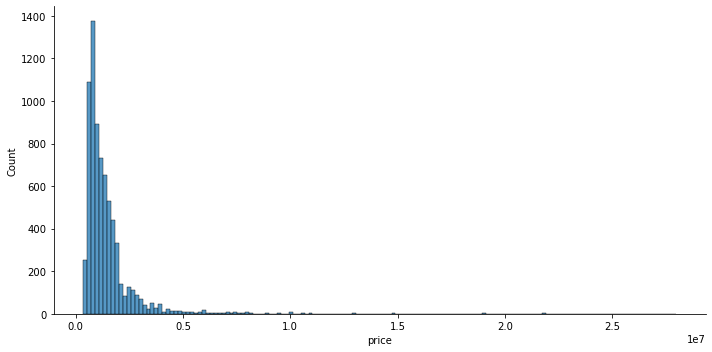

In [82]:
sns.displot(data=df,x=df["price"],height=5,aspect=2,bins=150)

In [83]:
df.groupby("region").mean()["price"]

region
Ajax, ON                      1.069384e+06
Aurora, ON                    2.204519e+06
Brampton, ON                  1.296141e+06
Brantford, ON                 8.698757e+05
Brock, ON                     1.190481e+06
Burlington, ON                1.320899e+06
Caledon, ON                   2.676405e+06
Cambridge, ON                 8.491352e+05
Clarington, ON                1.133770e+06
East Gwillimbury, ON          2.056118e+06
Georgina, ON                  1.250607e+06
Guelph, ON                    9.848519e+05
Halton Hills, ON              1.897911e+06
Hamilton, ON                  9.571767e+05
King, ON                      3.989348e+06
Kitchener, ON                 8.380746e+05
Markham, ON                   1.673423e+06
Milton, ON                    1.690602e+06
Mississauga, ON               1.188830e+06
Newmarket, ON                 1.423045e+06
Oakville, ON                  2.490236e+06
Old Toronto, Toronto, ON      1.154608e+06
Oshawa, ON                    9.602639e+05
Pick

<AxesSubplot:xlabel='region'>

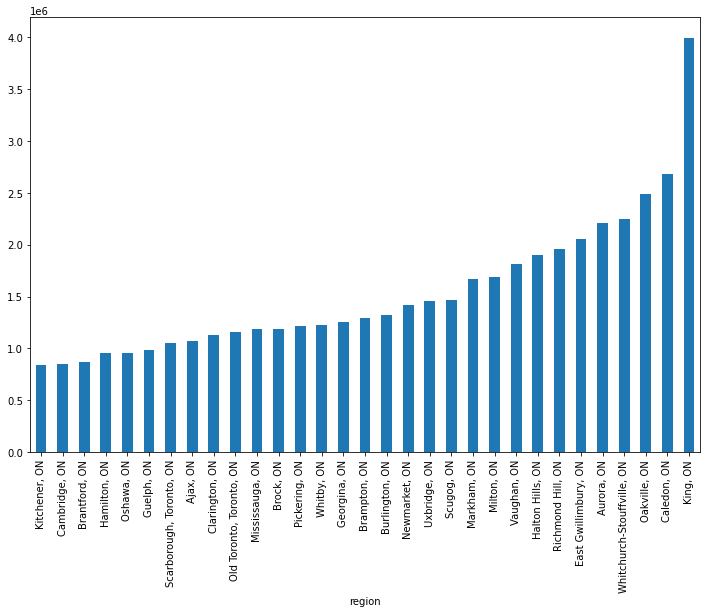

In [84]:
plt.figure(figsize=(12,8))
df.groupby("region").mean()["price"].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='bedrooms'>

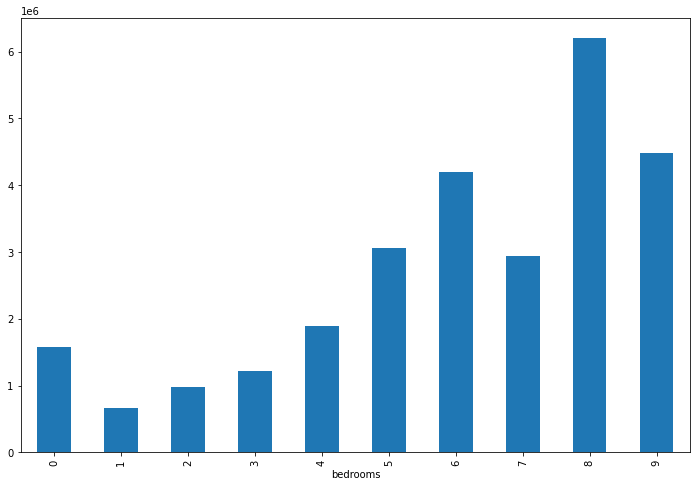

In [85]:
plt.figure(figsize=(12,8))
df.groupby("bedrooms").mean()["price"].plot(kind="bar")

<AxesSubplot:>

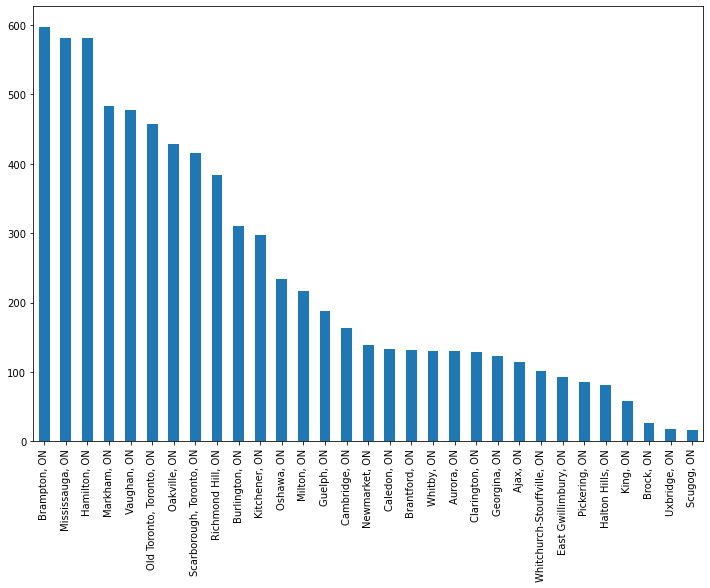

In [86]:
plt.figure(figsize=(12,8))
df["region"].value_counts().plot(kind="bar")

In [87]:
df.corr()

,price,bedrooms,bathrooms
price,1.000000,0.420552,0.544713
bedrooms,0.420552,1.000000,0.698085
bathrooms,0.544713,0.698085,1.000000


<AxesSubplot:>

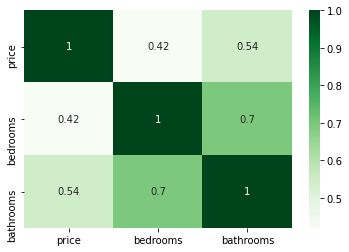

In [89]:
sns.heatmap(df.corr(),annot = True, cmap= "Greens")

In [90]:
df_region = pd.get_dummies(df["region"])
df = pd.concat([df,df_region], axis=1)
df = df.drop("region",axis=1)
df.head()

,price,bedrooms,bathrooms,"Ajax, ON","Aurora, ON","Brampton, ON","Brantford, ON","Brock, ON","Burlington, ON","Caledon, ON",...,"Old Toronto, Toronto, ON","Oshawa, ON","Pickering, ON","Richmond Hill, ON","Scarborough, Toronto, ON","Scugog, ON","Uxbridge, ON","Vaughan, ON","Whitby, ON","Whitchurch-Stouffville, ON"
0,799000,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,989000,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,999900,3,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,799900,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,899999,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("price",axis=1), df["price"], test_size=0.2, random_state=101)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lm = LinearRegression()

In [125]:
lm.fit(X_train,y_train)

LinearRegression()

In [126]:
lm.coef_

array([ 1.37310708e+06,  6.17297646e+06, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18, -3.58271365e+18, -3.58271365e+18, -3.58271365e+18,
       -3.58271365e+18])

In [127]:
predictions= lm.predict(X_test)

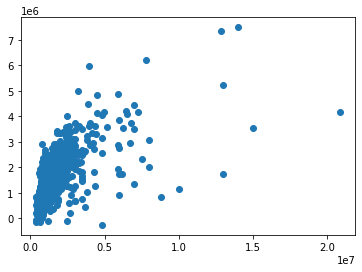

In [128]:
plt.scatter(x=y_test,y=predictions)

In [129]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 518514.376109215
MSE: 1100396605764.4348
RMSE: 1048997.9055100323


In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [131]:
ridge.fit(X_train,y_train)

Ridge()

In [132]:
ridgepredictions= ridge.predict(X_test)

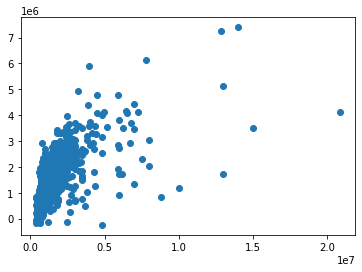

In [133]:
plt.scatter(x=y_test,y=ridgepredictions)

In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ridgepredictions))
print('MSE:', metrics.mean_squared_error(y_test, ridgepredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridgepredictions)))

MAE: 515479.8554815179
MSE: 1101249907742.1196
RMSE: 1049404.5491335168


In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rfr=RandomForestRegressor()

In [161]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [162]:
rfrpredictions= rfr.predict(X_test)

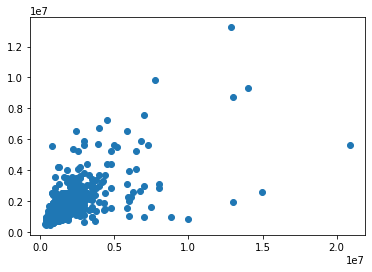

In [163]:
plt.scatter(x=y_test,y=rfrpredictions)

In [140]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rfrpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rfrpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfrpredictions)))

MAE: 417839.5725510247
MSE: 1005893393261.6824
RMSE: 1002942.3678665103


In [141]:
from xgboost import XGBRegressor

In [142]:
xgbr=XGBRegressor()

In [143]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [144]:
xgbrpredictions= xgbr.predict(X_test)

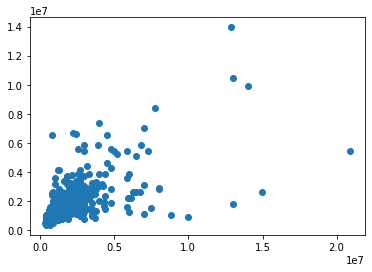

In [145]:
plt.scatter(x=y_test,y=xgbrpredictions)

In [146]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgbrpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xgbrpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbrpredictions)))

MAE: 414490.73442832765
MSE: 986611272137.3842
RMSE: 993283.0775450593


In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [148]:
X_train.shape

(5859, 33)

In [149]:
model = Sequential()

model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [150]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
46/46 [==============================] - 1s 5ms/step - loss: 3906805694464.0000 - val_loss: 3879593312256.0000
Epoch 2/400
46/46 [==============================] - 0s 2ms/step - loss: 3906734129152.0000 - val_loss: 3879370489856.0000
Epoch 3/400
46/46 [==============================] - 0s 2ms/step - loss: 3905827373056.0000 - val_loss: 3877028495360.0000
Epoch 4/400
46/46 [==============================] - 0s 2ms/step - loss: 3899529101312.0000 - val_loss: 3863922343936.0000
Epoch 5/400
46/46 [==============================] - 0s 2ms/step - loss: 3872638107648.0000 - val_loss: 3816802484224.0000
Epoch 6/400
46/46 [==============================] - 0s 2ms/step - loss: 3792832561152.0000 - val_loss: 3692569296896.0000
Epoch 7/400
46/46 [==============================] - 0s 2ms/step - loss: 3608597233664.0000 - val_loss: 3433834741760.0000
Epoch 8/400
46/46 [==============================] - 0s 2ms/step - loss: 3268640505856.0000 - val_loss: 2998446325760.0000
Epoch 9/400
46/4

46/46 [==============================] - 0s 2ms/step - loss: 1200830808064.0000 - val_loss: 1190204145664.0000
Epoch 68/400
46/46 [==============================] - 0s 2ms/step - loss: 1198196391936.0000 - val_loss: 1187619405824.0000
Epoch 69/400
46/46 [==============================] - 0s 2ms/step - loss: 1195143593984.0000 - val_loss: 1184424787968.0000
Epoch 70/400
46/46 [==============================] - 0s 2ms/step - loss: 1192093286400.0000 - val_loss: 1181404758016.0000
Epoch 71/400
46/46 [==============================] - 0s 2ms/step - loss: 1189634637824.0000 - val_loss: 1178173177856.0000
Epoch 72/400
46/46 [==============================] - 0s 2ms/step - loss: 1186554970112.0000 - val_loss: 1175045668864.0000
Epoch 73/400
46/46 [==============================] - 0s 2ms/step - loss: 1184954974208.0000 - val_loss: 1173236219904.0000
Epoch 74/400
46/46 [==============================] - 0s 2ms/step - loss: 1181924327424.0000 - val_loss: 1169953128448.0000
Epoch 75/400
46/46 [=

Epoch 133/400
46/46 [==============================] - 0s 2ms/step - loss: 1082710491136.0000 - val_loss: 1066420207616.0000
Epoch 134/400
46/46 [==============================] - 0s 2ms/step - loss: 1081901449216.0000 - val_loss: 1065073377280.0000
Epoch 135/400
46/46 [==============================] - 0s 2ms/step - loss: 1080315019264.0000 - val_loss: 1063922827264.0000
Epoch 136/400
46/46 [==============================] - 0s 2ms/step - loss: 1079551459328.0000 - val_loss: 1063022362624.0000
Epoch 137/400
46/46 [==============================] - 0s 2ms/step - loss: 1078656892928.0000 - val_loss: 1061338742784.0000
Epoch 138/400
46/46 [==============================] - 0s 2ms/step - loss: 1077132263424.0000 - val_loss: 1060545953792.0000
Epoch 139/400
46/46 [==============================] - 0s 2ms/step - loss: 1077193408512.0000 - val_loss: 1059484991488.0000
Epoch 140/400
46/46 [==============================] - 0s 2ms/step - loss: 1076166393856.0000 - val_loss: 1057641005056.0000


46/46 [==============================] - 0s 2ms/step - loss: 1021248667648.0000 - val_loss: 1002530537472.0000
Epoch 199/400
46/46 [==============================] - 0s 3ms/step - loss: 1020039593984.0000 - val_loss: 1000542240768.0000
Epoch 200/400
46/46 [==============================] - 0s 3ms/step - loss: 1018837467136.0000 - val_loss: 1000983625728.0000
Epoch 201/400
46/46 [==============================] - 0s 4ms/step - loss: 1017699762176.0000 - val_loss: 999813414912.0000
Epoch 202/400
46/46 [==============================] - 0s 2ms/step - loss: 1016839733248.0000 - val_loss: 999383171072.0000
Epoch 203/400
46/46 [==============================] - 0s 2ms/step - loss: 1016180899840.0000 - val_loss: 998291734528.0000
Epoch 204/400
46/46 [==============================] - 0s 3ms/step - loss: 1015509876736.0000 - val_loss: 996974788608.0000
Epoch 205/400
46/46 [==============================] - 0s 2ms/step - loss: 1014949085184.0000 - val_loss: 998166495232.0000
Epoch 206/400
46/46

46/46 [==============================] - 0s 3ms/step - loss: 969463496704.0000 - val_loss: 957801889792.0000
Epoch 265/400
46/46 [==============================] - 0s 2ms/step - loss: 968764751872.0000 - val_loss: 957841473536.0000
Epoch 266/400
46/46 [==============================] - 0s 2ms/step - loss: 968378023936.0000 - val_loss: 956423143424.0000
Epoch 267/400
46/46 [==============================] - 0s 2ms/step - loss: 968042151936.0000 - val_loss: 956355575808.0000
Epoch 268/400
46/46 [==============================] - 0s 2ms/step - loss: 967030145024.0000 - val_loss: 955964456960.0000
Epoch 269/400
46/46 [==============================] - 0s 2ms/step - loss: 966383108096.0000 - val_loss: 955747926016.0000
Epoch 270/400
46/46 [==============================] - 0s 2ms/step - loss: 966617268224.0000 - val_loss: 955451637760.0000
Epoch 271/400
46/46 [==============================] - 0s 2ms/step - loss: 965143560192.0000 - val_loss: 954864566272.0000
Epoch 272/400
46/46 [=========

46/46 [==============================] - 0s 2ms/step - loss: 929430503424.0000 - val_loss: 935427571712.0000
Epoch 331/400
46/46 [==============================] - 0s 2ms/step - loss: 928627818496.0000 - val_loss: 936788099072.0000
Epoch 332/400
46/46 [==============================] - 0s 2ms/step - loss: 928590659584.0000 - val_loss: 936909930496.0000
Epoch 333/400
46/46 [==============================] - 0s 2ms/step - loss: 928294895616.0000 - val_loss: 936550531072.0000
Epoch 334/400
46/46 [==============================] - 0s 2ms/step - loss: 927378112512.0000 - val_loss: 934467141632.0000
Epoch 335/400
46/46 [==============================] - 0s 2ms/step - loss: 926491607040.0000 - val_loss: 934598868992.0000
Epoch 336/400
46/46 [==============================] - 0s 2ms/step - loss: 925711728640.0000 - val_loss: 934340984832.0000
Epoch 337/400
46/46 [==============================] - 0s 2ms/step - loss: 925659955200.0000 - val_loss: 935010828288.0000
Epoch 338/400
46/46 [=========

Epoch 397/400
46/46 [==============================] - 0s 2ms/step - loss: 895136169984.0000 - val_loss: 925966925824.0000
Epoch 398/400
46/46 [==============================] - 0s 2ms/step - loss: 893622484992.0000 - val_loss: 923962638336.0000
Epoch 399/400
46/46 [==============================] - 0s 2ms/step - loss: 893631922176.0000 - val_loss: 924718989312.0000
Epoch 400/400
46/46 [==============================] - 0s 2ms/step - loss: 893325737984.0000 - val_loss: 924853075968.0000


In [151]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.906806e+12,3.879593e+12
1,3.906734e+12,3.879370e+12
2,3.905827e+12,3.877028e+12
3,3.899529e+12,3.863922e+12
4,3.872638e+12,3.816802e+12
...,...,...
395,8.949896e+11,9.247280e+11
396,8.951362e+11,9.259669e+11
397,8.936225e+11,9.239626e+11
398,8.936319e+11,9.247190e+11


<AxesSubplot:>

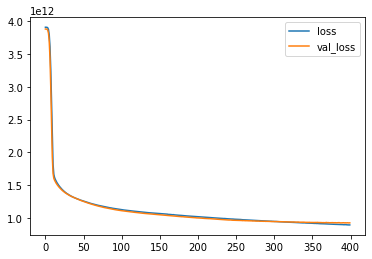

In [152]:
losses.plot()

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [154]:
predictions = model.predict(X_test)

46/46 [==============================] - 0s 819us/step


In [155]:
np.sqrt(mean_squared_error(y_test,predictions))

961692.8193734223

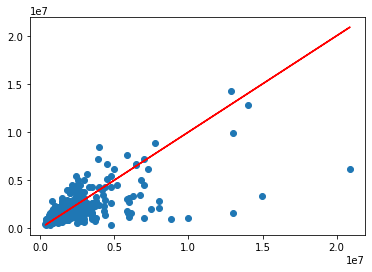

In [156]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [158]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [165]:
rfc = RandomForestRegressor()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [166]:
rfc_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [167]:
bestrfc = RandomForestRegressor(n_estimators=800,
 min_samples_split=10,
 min_samples_leaf=2,
 max_features='sqrt',
 max_depth=20,
 bootstrap=False)

In [168]:
bestrfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=800)

In [169]:
bestrfcpredictions= bestrfc.predict(X_test)

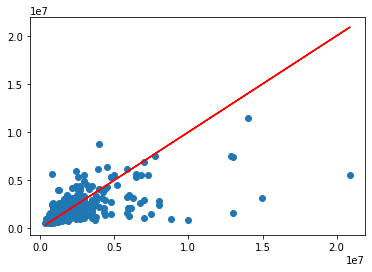

In [170]:
plt.scatter(y_test,bestrfcpredictions)
plt.plot(y_test,y_test,'r')

In [171]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, bestrfcpredictions))
print('MSE:', metrics.mean_squared_error(y_test, bestrfcpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bestrfcpredictions)))

MAE: 414146.68275232415
MSE: 972149784595.0421
RMSE: 985976.5639177446


In [184]:
colsample_bytree = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
gamma = [float(x) for x in np.linspace(start = 0, stop = 5, num = 51)]
learning_rate = [0.001,0.01,0.05,0.08,0.1,1]
min_child_weight = [float(x) for x in np.linspace(start = 0.5, stop = 20, num = 40)]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_distributions = dict(
    colsample_bytree = colsample_bytree,
    gamma = gamma,
    learning_rate = learning_rate,
    min_child_weight = min_child_weight,
    max_depth = max_depth
)
xgbr = XGBRegressor()

xgbr_random = RandomizedSearchCV(
            estimator=xgbr,
            param_distributions=param_distributions,
            cv=3, scoring='neg_mean_squared_error',n_iter = 100, verbose=2, n_jobs=-1)
xgbr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                                  2.4000000000000004, 2.5, 2.6,
                          

In [185]:
xgbr_random.best_params_

{'min_child_weight': 17.5,
 'max_depth': 89,
 'learning_rate': 1,
 'gamma': 2.6,
 'colsample_bytree': 0.5}

In [186]:
bestxgbr = XGBRegressor(min_child_weight=17.5, max_depth=89, learning_rate=1,gamma=2.6,colsample_bytree=0.5)

In [187]:
bestxgbr.fit(X_train, y_train)
bestxgbrpredictions= bestxgbr.predict(X_test)

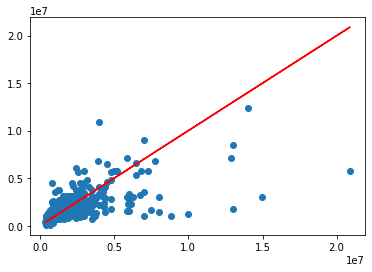

In [188]:
plt.scatter(y_test,bestxgbrpredictions)
plt.plot(y_test,y_test,'r')

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, bestxgbrpredictions))
print('MSE:', metrics.mean_squared_error(y_test, bestxgbrpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bestxgbrpredictions)))

MAE: 423304.5141744881
MSE: 985132645311.9369
RMSE: 992538.4855570775
